In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


data = pd.read_csv("Observation_data.csv")
data = data.fillna(0)
data.head()




,Zuid,Centrum,Oost,West,Noord,vwo,havo,vmbo,Age 0=12-15 1=1,Gender 0=m 1=f,...,bike,fatbike,scooter,visible brand logo(yes=1 no=0),basic,sporty,trendy,streetwear,alternative,preppy
0,1,0,0,0,0,1,1,1,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,1,1,1,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,1,1,1,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,1,1,1,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,1,1,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Lineair regression function
def linear_regression(data, target_column):
    # Separate the features (X) and target (y)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    results = {}
    
    for feature in X.columns:
        # Perform regression for each feature individually
        slope, intercept, r_value, p_value, std_err = linregress(X[feature], y)
        results[feature] = {
            "slope": slope,
            "intercept": intercept,
            "r_value": r_value,
            "p_value": p_value,
            "std_err": std_err
        }
        
        # Display the results
        print(f"Feature: {feature}")
        print(f"  Slope: {slope}")
        print(f"  Intercept: {intercept}")
        print(f"  R-squared: {r_value**2}")
        print(f"  P-value: {p_value}")
        print(f"  Standard Error: {std_err}\n")
    
    return results



  
lin_reg_vape = linear_regression(data, "vaper(1=yes)")
lin_reg_cigarette = linear_regression(data, "cigarette smoker (1=yes)")


Feature: Zuid
  Slope: 0.3526398739164696
  Intercept: 0.07328605200945626
  R-squared: 0.08200690535971583
  P-value: 1.8963094779370065e-18
  Standard Error: 0.039372024314590665

Feature: Centrum
  Slope: -0.0986078886310894
  Intercept: 0.09860788863109043
  R-squared: 0.0045976684269709986
  P-value: 0.04198214107256522
  Standard Error: 0.04841768208769199

Feature: Oost
  Slope: 0.04171020117087076
  Intercept: 0.08040201005025129
  R-squared: 0.004542814403958406
  P-value: 0.043227923758216956
  Standard Error: 0.020604065033972423

Feature: West
  Slope: -0.08722081419293534
  Intercept: 0.14018691588785054
  R-squared: 0.022184492906236263
  P-value: 7.217221393103571e-06
  Standard Error: 0.019323494829373

Feature: Noord
  Slope: -0.09803921568627434
  Intercept: 0.0980392156862745
  R-squared: 0.0039696860339227605
  P-value: 0.058836393382042794
  Standard Error: 0.05182267876749945

Feature: vwo
  Slope: -0.24249999999999902
  Intercept: 0.3099999999999991
  R-squared: 

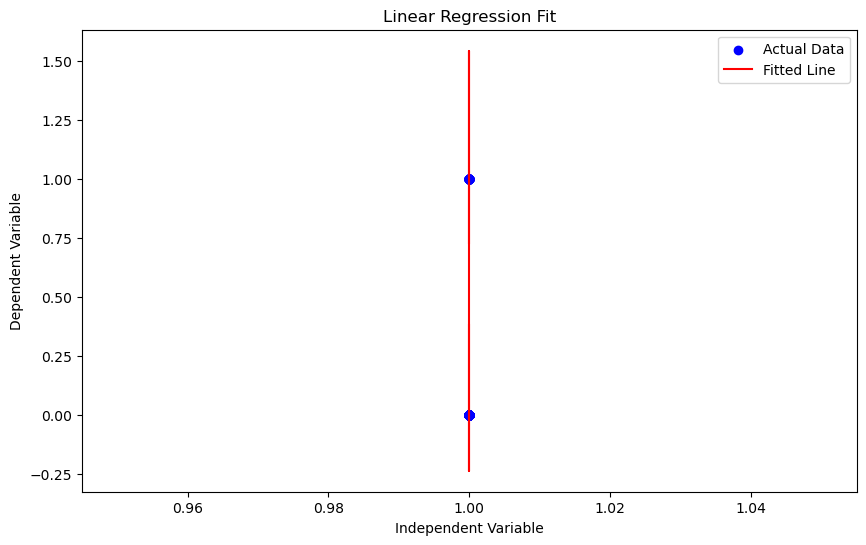

                            OLS Regression Results                            
Dep. Variable:           vaper(1=yes)   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     46.82
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          6.80e-156
Time:                        18:12:45   Log-Likelihood:                 252.58
No. Observations:                 900   AIC:                            -445.2
Df Residuals:                     870   BIC:                            -301.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

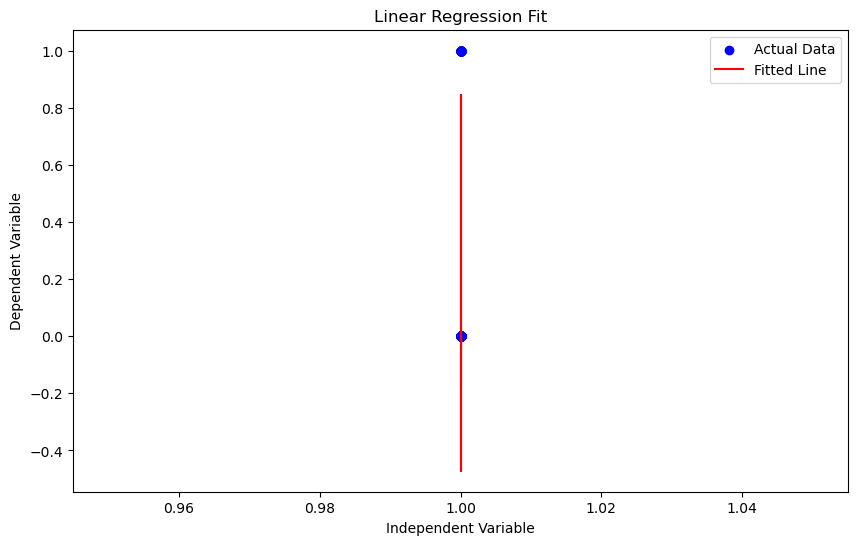

                               OLS Regression Results                               
Dep. Variable:     cigarette smoker (1=yes)   R-squared:                       0.263
Model:                                  OLS   Adj. R-squared:                  0.238
Method:                       Least Squares   F-statistic:                     10.69
Date:                      Tue, 03 Dec 2024   Prob (F-statistic):           9.05e-41
Time:                              18:12:45   Log-Likelihood:                -56.266
No. Observations:                       900   AIC:                             172.5
Df Residuals:                           870   BIC:                             316.6
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:


# Lineair regression function try 2
def mvlg(data, target):

    # Separate the features (X) and target (y)
    X = data.drop(columns=[target])
    y = data[target]

    # Add intercept term
    X = sm.add_constant(X)

    # Fitting the Ordinary Least Squares (OLS) model
    model = sm.OLS(y, X).fit()

    # Get predicted values
    y_pred = model.predict(X)

    # Plot the original data and the fitted line
    plt.figure(figsize=(10, 6))

    # Plot the scatter plot of the actual data
    plt.scatter(X['const'], y, color='blue', label='Actual Data')

    # Plot the regression line (or predicted values)
    plt.plot(X['const'], y_pred, color='red', label='Fitted Line')
    
    # Customize the plot
    plt.title('Linear Regression Fit')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.legend()

    # Show the plot
    plt.show()
    
    # Print the summary of the regression results
    print(model.summary())
    
    return model


model_vape = mvlg(data, "vaper(1=yes)")
model_vape = mvlg(data, "cigarette smoker (1=yes)")

In [27]:
correlation_matrix = data.corr()
high_corr = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix < 1.0)]
print(high_corr)

                                             Zuid  Centrum  Oost  West  Noord  \
Zuid                                          NaN      NaN   NaN   NaN    NaN   
Centrum                                       NaN      NaN   NaN   NaN    NaN   
Oost                                          NaN      NaN   NaN   NaN    NaN   
West                                          NaN      NaN   NaN   NaN    NaN   
Noord                                         NaN      NaN   NaN   NaN    NaN   
vwo                                           NaN      NaN   NaN   NaN    NaN   
havo                                          NaN      NaN   NaN   NaN    NaN   
vmbo                                          NaN      NaN   NaN   NaN    NaN   
Age 0=12-15 1=1                               NaN      NaN   NaN   NaN    NaN   
Gender 0=m 1=f                                NaN      NaN   NaN   NaN    NaN   
Ethnicity=white                               NaN      NaN   NaN   NaN    NaN   
Ethnicity=black             